# Beauty Cluster 

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd 
import numpy as np
pd.set_option("max_rows", 500)
pd.set_option("max_columns", 500)
pd.set_option('float_format', '{:f}'.format)

import dataload

import os 
import datetime
from tqdm import tqdm 
from functools import reduce

In [173]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 

plt.style.use('seaborn')
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [3]:
buy_full = dataload.load_buy()
print(buy_full.shape)
buy_full.head()

(2056899, 6)


,date,sex,age,big_cat,sm_cat,qty
0,20180101,F,20,식품,가공란,37
1,20180101,F,30,식품,가공란,16
2,20180101,F,40,식품,가공란,9
3,20180101,F,50,식품,가공란,3
4,20180101,M,20,식품,가공란,13


In [97]:
beauty = pd.read_csv('beauty_tsclustering2.csv', encoding='cp949')
weather = pd.read_csv('weather_final.csv', encoding='cp949')

beauty.shape, weather.shape

((131, 367), (11680, 27))

In [98]:
tqdm.pandas()
buy_full["date"] = buy_full["date"].progress_apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d'))
weather["날짜"] = weather["날짜"].progress_apply(lambda x : pd.to_datetime(x))

100%|██████████| 11680/11680 [00:00<00:00, 15756.95it/s]


In [99]:
def cluster_buy_df(c) : 
    clusterdf = beauty[beauty["cluster"] == c]
    df = buy_full[buy_full.sm_cat.isin(list(clusterdf["sm_cat"]))] 
    df = df.groupby('date').sum('qty').reset_index()[["date","qty"]]
    return df

In [120]:
def weather_correlation(buy_df, loc) : 
    df = weather[weather.지역 == loc].reset_index(drop=True)
    df = df.merge(buy_df, left_on="날짜", right_on="date")
    df = df.drop(['연', '월', '일', '분기', '요일', '공휴일명', '공휴일여부', '주말여부', '계절', '폭염여부', '강수여부'], axis=1)
    co = dict(df.corr()["qty"])
    return co

In [121]:
def display_weather_correlation(buy_df) : 
    weathercorrelation = dict()
    for loc in weather.지역.unique() : 
        weathercorrelation[loc] = weather_correlation(buy_df, loc)
    
    tmp = pd.DataFrame(weathercorrelation)
    tmp = tmp.drop(['지점번호', 'qty'], axis=0)
    return tmp

In [175]:
def weather_qty_graph(buy_df, loc) : 
    df = weather[weather.지역 == loc].reset_index(drop=True)
    df = df.merge(buy_df, left_on="날짜", right_on="date")
    df = df.drop(['날짜', '지점번호', '지역', '연', '월', '일', '분기', '요일', '공휴일명', '공휴일여부', '주말여부', '계절', '폭염여부', '강수여부'], axis=1)

    for i, w in enumerate([col for col in list(df.columns) if col not in ['date', 'qty']]) : 
        plt.figure(i)
        plt.figure(figsize=(15,3))
        
        sns.lineplot(x='date', y='qty', data=df)
        ax2 = plt.twinx()
        sns.lineplot(x='date', y=w, data=df, ax=ax2, color='g')
        plt.title(f'{loc} {w}')
        plt.show()

# 1. Cluster0 : 몽땅 클러스터 
* 서울 + 천안 (기온, 미세먼지 상관계수 높음), 

In [122]:
display_weather_correlation(cluster_buy_df(0))

,강릉,인천,수원,안동,울산,제주,천안,청주,대구,창원,여수,부산,서울,광주,전주,대전
평균기온,-0.422198,-0.436070,-0.446815,-0.455867,-0.429520,-0.424844,-0.457049,-0.446829,-0.440224,-0.436135,-0.427460,-0.419417,-0.444439,-0.455026,-0.448998,-0.449578
최고기온,-0.398839,-0.436165,-0.446410,-0.452050,-0.416518,-0.423433,-0.450732,-0.447148,-0.430854,-0.428844,-0.423467,-0.407246,-0.439383,-0.454021,-0.445187,-0.445866
최저기온,-0.422355,-0.434698,-0.443897,-0.446571,-0.432239,-0.417477,-0.445519,-0.443950,-0.439152,-0.432612,-0.422662,-0.418080,-0.444061,-0.444030,-0.441486,-0.445172
일별강수량,-0.031679,-0.083020,-0.067059,-0.050816,-0.061733,-0.023355,-0.058141,-0.059927,-0.087610,-0.088277,-0.089877,-0.098457,-0.097694,-0.091278,-0.076587,-0.069478
1시간최대강수량,-0.043539,-0.070749,-0.071881,-0.045401,-0.069981,-0.017158,-0.049171,-0.054985,-0.099500,-0.090663,-0.084357,-0.088165,-0.099756,-0.090820,-0.079201,-0.061153
평균풍속,0.155785,0.092302,-0.092165,-0.041804,0.050783,0.077229,-0.138000,-0.236345,-0.034650,-0.030695,0.090689,-0.076822,0.121910,-0.074001,-0.001968,-0.164895
PM10,0.009700,0.202178,0.180890,0.092246,0.019817,0.037314,0.241745,0.192920,0.155858,0.076668,0.062623,0.052103,0.180621,0.171674,0.170169,0.180504
PM25,0.083934,0.166618,0.185690,0.101894,-0.016771,0.026265,0.230765,0.199121,0.173175,0.069680,0.087976,0.070185,0.156817,0.162721,0.198478,0.203482
1시간최대습도,-0.241118,-0.181589,-0.101158,-0.203263,-0.242680,-0.237188,-0.085079,-0.062953,-0.158198,-0.336714,-0.321749,-0.288823,-0.173480,-0.246452,-0.266519,-0.152464
일조시간합,-0.001342,-0.079570,-0.074918,-0.078945,-0.035807,-0.164761,-0.130569,-0.118275,-0.027715,0.022779,-0.060109,-0.009245,-0.075186,-0.080234,-0.099144,-0.103369


<Figure size 576x396 with 0 Axes>

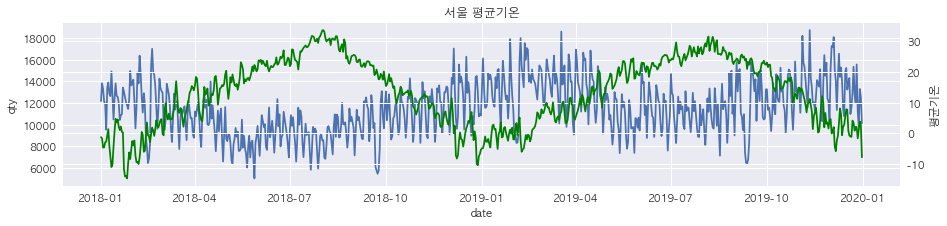

<Figure size 576x396 with 0 Axes>

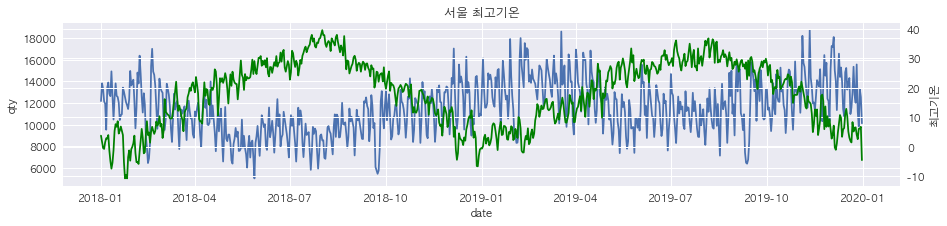

<Figure size 576x396 with 0 Axes>

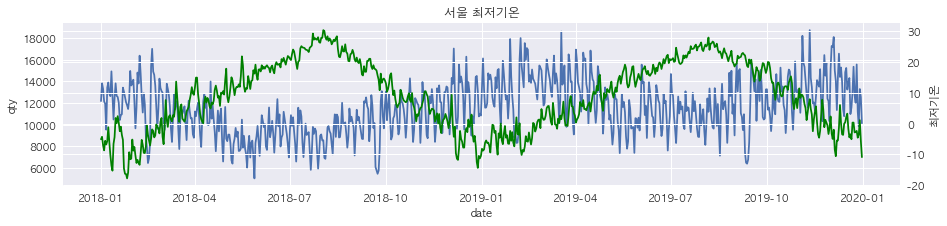

<Figure size 576x396 with 0 Axes>

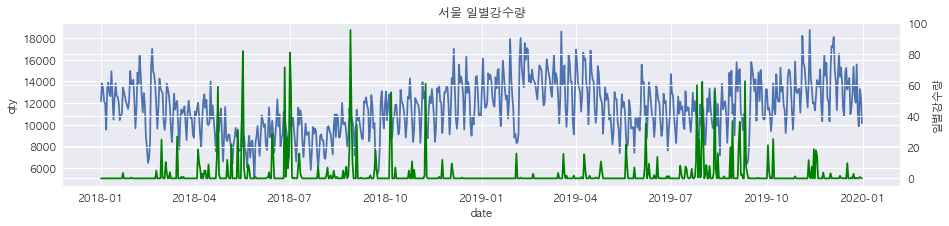

<Figure size 576x396 with 0 Axes>

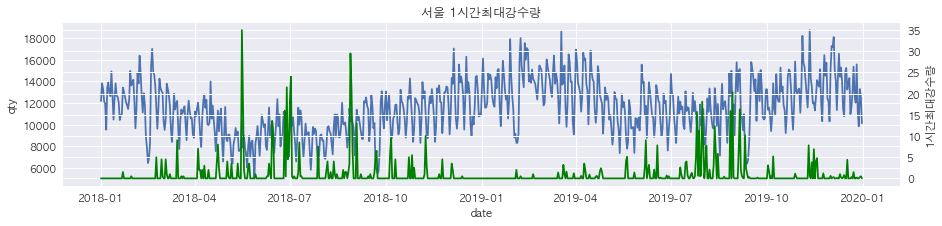

<Figure size 576x396 with 0 Axes>

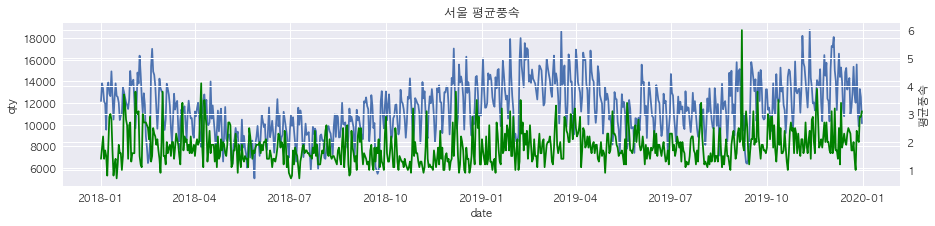

<Figure size 576x396 with 0 Axes>

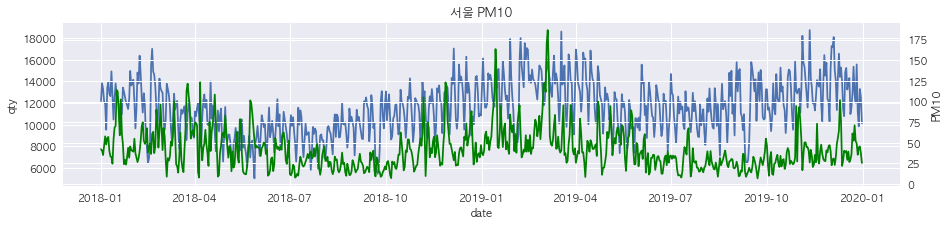

<Figure size 576x396 with 0 Axes>

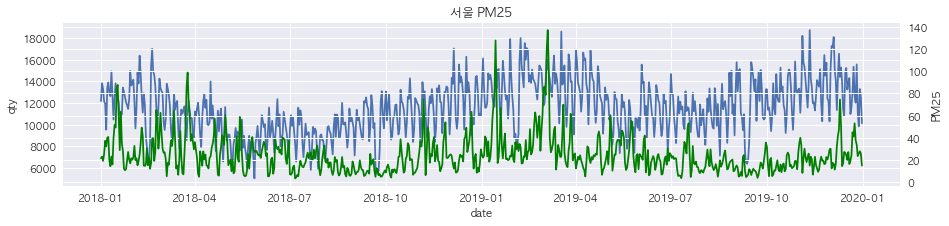

<Figure size 576x396 with 0 Axes>

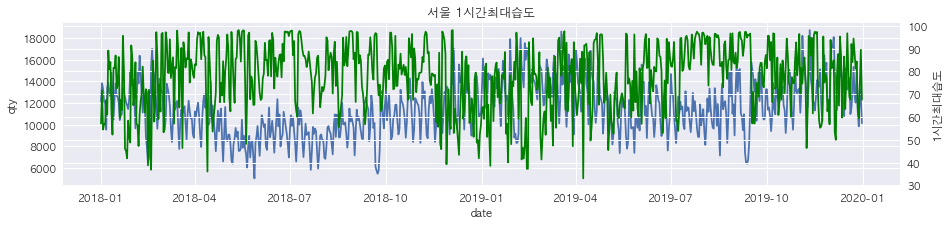

<Figure size 576x396 with 0 Axes>

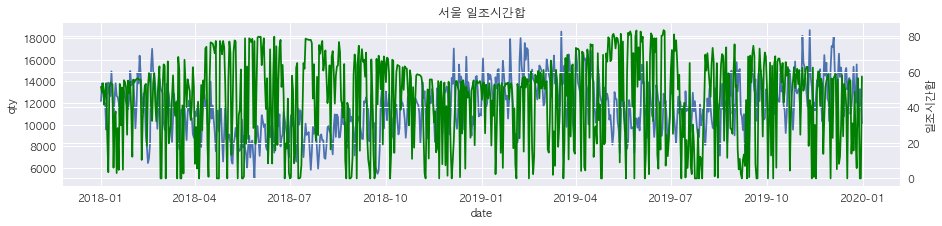

<Figure size 576x396 with 0 Axes>

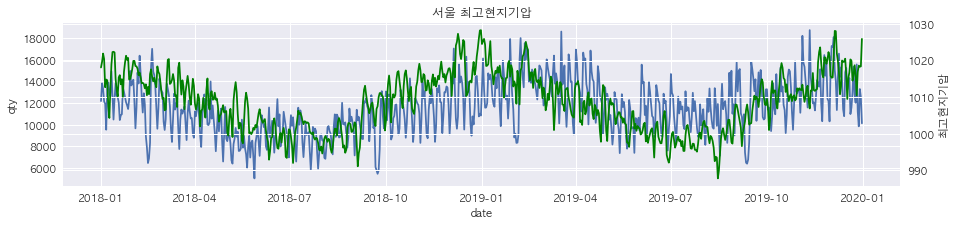

<Figure size 576x396 with 0 Axes>

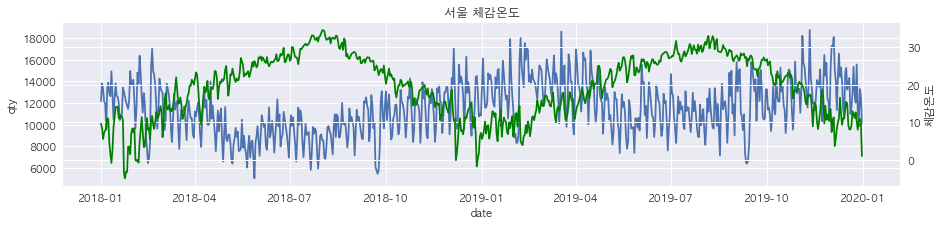

<Figure size 576x396 with 0 Axes>

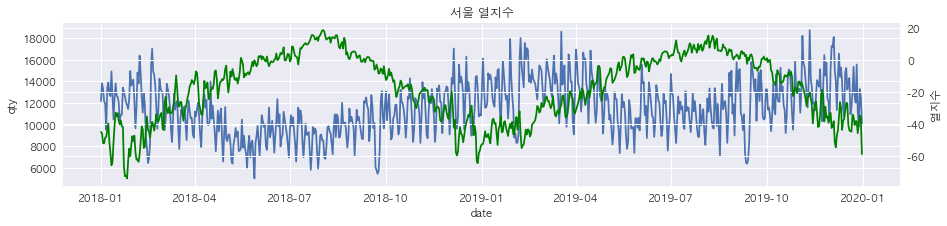

In [176]:
weather_qty_graph(cluster_buy_df(0), "서울")

# 2. Cluster1 : 여름 인기 제품 

In [154]:
display_weather_correlation(cluster_buy_df(1))

,강릉,인천,수원,안동,울산,제주,천안,청주,대구,창원,여수,부산,서울,광주,전주,대전
평균기온,0.353018,0.310320,0.338401,0.360048,0.327393,0.273621,0.350490,0.359274,0.362745,0.318058,0.294052,0.291217,0.345028,0.331417,0.331538,0.356120
최고기온,0.357662,0.322427,0.357037,0.370272,0.339370,0.294613,0.361956,0.373051,0.372273,0.342297,0.304283,0.285972,0.354302,0.346817,0.350541,0.370608
최저기온,0.326109,0.303222,0.309490,0.304403,0.298393,0.256513,0.303257,0.327421,0.320629,0.288745,0.276667,0.286006,0.320345,0.298405,0.300105,0.318079
일별강수량,-0.016250,0.025215,0.024193,0.008548,-0.003365,-0.020618,-0.006727,0.002039,-0.016736,0.028980,0.038798,0.021875,0.059769,0.006879,0.012916,-0.014605
1시간최대강수량,0.008462,0.035562,0.041489,0.031719,0.010231,-0.014008,0.027592,0.018377,0.010560,0.012692,0.043943,0.017124,0.081475,0.000479,0.032993,0.005219
평균풍속,-0.070555,-0.064605,0.091660,0.067772,-0.107080,-0.084741,0.103118,0.125679,0.028590,-0.004261,-0.121616,0.133817,-0.002860,0.074372,0.055418,0.151153
PM10,0.174456,0.041960,0.066578,0.057985,0.123910,0.041079,0.003533,-0.008565,0.014541,0.036934,0.057595,0.086999,0.075831,0.039532,-0.044960,-0.006653
PM25,0.055979,0.032085,0.017618,-0.101976,0.132732,0.042333,-0.005734,-0.056914,-0.017071,0.051673,0.047120,0.089582,0.066635,-0.009783,-0.089317,-0.033290
1시간최대습도,0.086169,0.200159,0.051323,0.029944,0.121296,0.081131,0.051244,-0.096929,0.020726,0.159078,0.218209,0.178461,0.041217,0.064381,0.030369,-0.052354
일조시간합,0.104005,0.084423,0.084514,0.139668,0.131274,0.200688,0.117880,0.106080,0.092251,0.111434,0.106733,0.102933,0.111354,0.094423,0.102790,0.113890


# 3. Cluster2 

In [124]:
display_weather_correlation(cluster_buy_df(2))

,강릉,인천,수원,안동,울산,제주,천안,청주,대구,창원,여수,부산,서울,광주,전주,대전
평균기온,-0.123395,-0.146844,-0.136912,-0.130346,-0.133642,-0.171164,-0.136615,-0.128763,-0.120687,-0.140106,-0.154127,-0.148357,-0.130830,-0.149041,-0.147989,-0.130664
최고기온,-0.109891,-0.139708,-0.122438,-0.121421,-0.125217,-0.167221,-0.128140,-0.121631,-0.111156,-0.118610,-0.144230,-0.145076,-0.118759,-0.133833,-0.136013,-0.121918
최저기온,-0.138263,-0.146727,-0.142998,-0.150724,-0.143407,-0.169583,-0.148002,-0.139327,-0.139579,-0.153929,-0.159242,-0.147333,-0.139493,-0.157389,-0.154248,-0.144071
일별강수량,0.002984,-0.017436,-0.016219,-0.024193,-0.023440,-0.016120,-0.042327,-0.029681,-0.060491,-0.034620,-0.032862,-0.047822,-0.009641,-0.073977,-0.059569,-0.017219
1시간최대강수량,0.016092,0.000153,-0.022388,-0.001937,-0.004650,-0.011195,-0.016243,-0.011031,-0.052155,-0.024540,-0.033398,-0.028915,-0.000070,-0.082569,-0.051987,0.015719
평균풍속,0.075369,0.049921,0.028176,0.060656,0.035523,0.027261,0.020259,-0.022225,0.050064,-0.005892,0.048525,0.057012,0.075192,0.000855,0.038555,0.015266
PM10,0.082559,0.144711,0.146016,0.118073,0.106461,0.047180,0.153673,0.114561,0.103178,0.097417,0.080210,0.117525,0.156576,0.128459,0.100322,0.116460
PM25,0.115065,0.132606,0.133045,0.093182,0.111118,0.063569,0.144071,0.103149,0.103450,0.113358,0.116647,0.143881,0.144308,0.118218,0.098506,0.120009
1시간최대습도,-0.121281,-0.015125,-0.071989,-0.125613,-0.107630,-0.106560,-0.082537,-0.115510,-0.123357,-0.134759,-0.092554,-0.109086,-0.103363,-0.142918,-0.134064,-0.153683
일조시간합,0.077448,0.025050,0.026449,0.060189,0.040205,0.008469,0.013389,0.003752,0.055203,0.060965,0.027468,0.042045,0.029860,0.025958,0.017021,0.004723


# 4. Cluster3

In [125]:
display_weather_correlation(cluster_buy_df(3))

,강릉,인천,수원,안동,울산,제주,천안,청주,대구,창원,여수,부산,서울,광주,전주,대전
평균기온,-0.065605,-0.092509,-0.075926,-0.061641,-0.069992,-0.108439,-0.069933,-0.066422,-0.053617,-0.079882,-0.102376,-0.098177,-0.073229,-0.084854,-0.081577,-0.065937
최고기온,-0.053707,-0.090382,-0.071962,-0.065209,-0.062905,-0.100678,-0.074037,-0.068757,-0.053762,-0.068327,-0.098641,-0.105095,-0.074128,-0.080187,-0.076325,-0.067584
최저기온,-0.081870,-0.089134,-0.077514,-0.077343,-0.079014,-0.106269,-0.076282,-0.074119,-0.061584,-0.084054,-0.102066,-0.094969,-0.075698,-0.084789,-0.082616,-0.075625
일별강수량,-0.034252,0.020594,0.024166,0.018894,-0.047761,-0.014523,0.003048,0.005338,-0.029438,-0.017706,-0.001299,-0.031512,0.014744,-0.024841,0.014642,-0.005099
1시간최대강수량,-0.029814,0.025496,0.004715,0.020564,-0.034199,0.004504,0.016642,0.001119,-0.012636,-0.020022,0.002935,-0.029213,-0.001716,-0.034996,0.001091,-0.000009
평균풍속,0.098929,0.054179,0.048282,0.096229,0.061742,0.040735,0.049223,0.022908,0.044264,0.045620,0.018969,0.114251,0.066293,0.085811,0.101766,0.065035
PM10,0.062922,0.093315,0.100369,0.116541,0.111521,0.056463,0.097744,0.073992,0.082882,0.070415,0.062794,0.111004,0.108136,0.092210,0.063183,0.092871
PM25,0.064987,0.077658,0.070038,0.089291,0.071693,0.051730,0.085274,0.056580,0.055495,0.057066,0.071571,0.103225,0.091383,0.056106,0.031559,0.063497
1시간최대습도,-0.102097,0.012007,-0.092099,-0.151310,-0.097894,-0.030604,-0.044969,-0.046502,-0.125949,-0.114181,-0.014403,-0.047432,-0.058030,-0.100801,-0.112905,-0.119849
일조시간합,0.058765,-0.014417,-0.020974,0.054937,0.047059,0.015266,-0.008621,-0.004747,0.045384,0.046799,0.007940,0.031203,-0.017043,-0.009111,0.011476,0.011920
